In [1]:
####a classificaton problem using logit regression
import numpy as np
import math as mt
import pandas as pd
import matplotlib.pyplot as plt

def p(x,b):
    dot=float(np.matmul(b.reshape(1,3),x.reshape(3,1))[0])
    return mt.e**dot/(1+mt.e**dot)


def firstd(y,x,b):
    sum=np.zeros(x[0].reshape(3,1).shape)
    for i in range(len(y)):
        sum+=x[i].reshape(3,1)*(y[i]-p(x[i],b))
    return -sum

def secondd(y,x,b):
    sum=np.zeros(np.matmul(x[0].reshape(3,1),x[0].reshape(1,3)).shape)
    for i in range(len(y)):
        sum+=np.matmul(x[i].reshape(3,1),x[i].reshape(1,3))*p(x[i],b)*(1-p(x[i],b))
    return sum

    


# use newton method to get coeffient vector beta
def getbetanewton(y,x,b):
    return b-np.matmul(np.linalg.inv(secondd(y,x,b)),firstd(y,x,b))
# use gradient descent method to get coeffient vector beta
def getbetadecent(y,x,b,n):
    return b-firstd(y,x,b)/n

In [2]:
#####excel directory is local
data = pd.read_excel(r'C:\Users\Admin\Downloads\dingguagua.xlsx')
x = np.array(data[['midu','hantanglv','constant']])
y=np.array(data[['goodgua']]).reshape(-1)
b=np.array([1/2,1/2,1/2]).reshape(3,1)

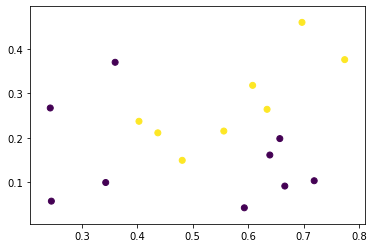

In [9]:
###visualise original data
plt.scatter(x[:,0],x[:,1],c=y)


coeffients(newton):
 [[ 3.15832966]
 [12.52119579]
 [-4.42886451]]
precision: 0.7058823529411765
coeffients(descent):
 [[ 1.36916686]
 [ 3.88584692]
 [-1.65138214]]
precision: 0.6470588235294118


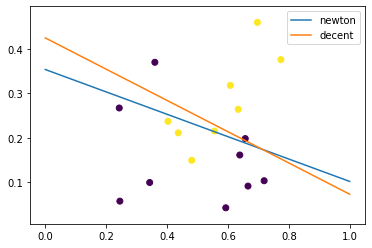

In [14]:
plt.scatter(x[:,0],x[:,1],c=y,label=['good','bad'])
plt.legend()

### Newton's method
#number of iter=10000
for i in range(10000):
    b=getbetanewton(y,x,b).reshape(3,1)
bnewton=b

##visualize the desicion boundary
line=np.linspace(0,1,10000)
yline=[]
for i in line:
    yx=-1/b[1]*(b[0]*i+b[2])
    yline.append(yx)
plt.plot(line,yline)


### Gradient descent
b=np.array([1/2,1/2,1/2]).reshape(3,1)
for i in range(10000):
    b=getbetadecent(y,x,b,i+1).reshape(3,1)
line=np.linspace(0,1,10000)
yline=[]
for i in line:
    yx=-1/b[1]*(b[0]*i+b[2])
    yline.append(yx)
plt.plot(line,yline)
plt.legend(['newton','decent'])
bdecent=b

###get precision of classification (right match: 1, mismatch: 0)
def precision(y,X,b):
    sum=0
    for i in range(len(y)):
        if p(x[i],b)>=0.5:
            sum+=abs(0-y[i])
        if p(x[i],b)<0.5:
            sum+=abs(1-y[i])
    return sum/len(y)

###print coeffients and results  [constant, x1, x2]
print('coeffients(newton):\n',bnewton)
print('precision:',precision(y,x,bnewton))
print('coeffients(descent):\n',bdecent)
print('precision:',precision(y,x,bdecent))
    